In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

from sklearn.preprocessing import minmax_scale

In [3]:
from sklearn.metrics import plot_roc_curve

In [4]:
train_dataset = pd.read_csv('/Users/nikitaseleznev/Downloads/train.csv', sep=',')

In [5]:
test_dataset = pd.read_csv('/Users/nikitaseleznev/Downloads/test.csv', sep=',')

In [64]:
test_dataset.head()

,id,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


In [65]:
train_dataset.head()

,id,url,title,target
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",False
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,False
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,False
3,3,colorbox.spb.ru,Не Беси Меня Картинки,False
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,False
5,5,beregifiguru.ru,Салат: корейская морковь + копченая курица + к...,False
6,6,ekb.vseinstrumenti.ru,"Угловой пневмогайковерт FUBAG RWC 105 1/2"" 100...",False
7,7,mirtabaka.org,Табачный магазин `Мир Табака` | КУРИТЕЛЬНЫЕ ТР...,False
8,8,xlecx.com,league of legends » Page 5 » Porn comics free ...,True
9,9,bus.biletyplus.ua,"08:00 (4766р), Одесса - Ростов-на-Дону 20 сент...",False


In [39]:
print(train_dataset.shape)
print(test_dataset.shape)

(135309, 4)
(165378, 3)


In [9]:
f_names=['url', 'title']
f_names

['url', 'title']

In [10]:
train_dataset.isna().mean()

id        0.0
url       0.0
title     0.0
target    0.0
dtype: float64

In [43]:
X_1_train_raw = train_dataset['url']
X_2_train_raw = train_dataset['title']
y = train_dataset['target'].astype(int).values
X_1_test_raw = test_dataset['url']
X_2_test_raw = test_dataset['title']

In [12]:
train_dataset['target'].value_counts()

False    118594
True      16715
Name: target, dtype: int64

In [14]:
import requests
website_url = requests.get('https://ru.wikipedia.org/wiki/Список_доменов_верхнего_уровня').text

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Список доменов верхнего уровня — Википедия
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"e2bd816c-08ce-490c-8140-e47e369ac15a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Список_доменов_верхнего_уровня","wgTitle":"Список доменов верхнего уровня","wgCurRevisionId":109382064,"wgRevisionId":109382064,"wgArticleId":40012,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Статьи с нерабочими ссылками",
"Википедия:Статьи с некорректным использованием шаблонов:Ci

In [18]:
first_table = soup.find('table',{'class':'wikitable sortable'})
first_table

<table class="wikitable sortable">
<tbody><tr style="background-color:#a0d0ff">
<th>Имя
</th>
<th>Назначение
</th>
<th class="unsortable">Примечания
</th>
<th>IDN
</th>
<th>DNSSEC
</th></tr>
<tr valign="top">
<td><a class="new" href="/w/index.php?title=.academy&amp;action=edit&amp;redlink=1" title=".academy (страница отсутствует)">.academy</a></td>
<td></td>
<td></td>
<td class="table-yes" style="background-color:#90ff90; color:black; vertical-align:middle; text-align:center;">Да</td>
<td class="table-yes" style="background-color:#90ff90; color:black; vertical-align:middle; text-align:center;">Да
</td></tr>
<tr valign="top">
<td><a class="new" href="/w/index.php?title=.accountant&amp;action=edit&amp;redlink=1" title=".accountant (страница отсутствует)">.accountant</a></td>
<td></td>
<td></td>
<td class="unknown table-unknown" style="background: #E4E4E4; color: #2C2C2C; font-size: smaller; vertical-align: middle; text-align: center;">Неизвестно</td>
<td class="table-yes" style="backgrou

In [20]:
links_1 = first_table.find_all('a')
links_1

[<a class="new" href="/w/index.php?title=.academy&amp;action=edit&amp;redlink=1" title=".academy (страница отсутствует)">.academy</a>,
 <a class="new" href="/w/index.php?title=.accountant&amp;action=edit&amp;redlink=1" title=".accountant (страница отсутствует)">.accountant</a>,
 <a class="new" href="/w/index.php?title=.accountants&amp;action=edit&amp;redlink=1" title=".accountants (страница отсутствует)">.accountants</a>,
 <a class="new" href="/w/index.php?title=.active&amp;action=edit&amp;redlink=1" title=".active (страница отсутствует)">.active</a>,
 <a class="new" href="/w/index.php?title=.actor&amp;action=edit&amp;redlink=1" title=".actor (страница отсутствует)">.actor</a>,
 <a class="new" href="/w/index.php?title=.adult&amp;action=edit&amp;redlink=1" title=".adult (страница отсутствует)">.adult</a>,
 <a href="/wiki/.aero" title=".aero">.aero</a>,
 <a class="new" href="/w/index.php?title=.agency&amp;action=edit&amp;redlink=1" title=".agency (страница отсутствует)">.agency</a>,
 <a 

In [22]:
import re
names_1 = []
for link in links_1:
    tmp_str = str(link.get('title'))
    tmp_str = tmp_str[1:].split('(')[0]
    if (tmp_str != 'None' and
        tmp_str != '.xxx' and
        tmp_str != '.adult' and
        tmp_str != '.porn' and
        tmp_str != '.rest' and
        tmp_str != '.moe' and
        tmp_str and not bool(re.search('[а-яА-Я]', tmp_str))):
        names_1.append(tmp_str)
names_1.append('.art')
print(names_1)

['academy ', 'accountant ', 'accountants ', 'active ', 'actor ', 'adult ', 'aero', 'agency ', 'airforce ', 'apartments ', 'app ', 'archi ', 'army ', 'associates ', 'asia', 'attorney ', 'auction ', 'audio ', 'autos ', 'biz', 'cat', 'com', 'coop', 'dance ', 'edu', 'eus ', 'family ', 'gov', 'info', 'int', 'jobs', 'mil', 'mobi', 'museum', 'name', 'net', 'one ', 'ong ', 'onl ', 'online', 'ooo ', 'org', 'organic ', 'partners ', 'parts ', 'party ', 'pharmacy ', 'photo ', 'photography ', 'photos ', 'physio ', 'pics ', 'pictures ', 'feedback ', 'pink ', 'pizza ', 'place ', 'plumbing ', 'plus ', 'poker ', 'porn ', 'post', 'press ', 'pro', 'productions ', 'prof ', 'properties', 'property ', 'qpon ', 'racing ', 'recipes ', 'red ', 'rehab ', 'ren ', 'rent ', 'rentals ', 'repair ', 'report ', 'republican ', 'rest ', 'review ', 'reviews ', 'rich ', 'site ', 'tel', 'one', 'trade ', 'travel', 'xxx', 'xyz', 'yoga ', 'zone ', 'ninja ', 'one', 'one', 'moe', 'dev', '.art']


In [24]:
second_table = soup.find_all('table')
second_table = second_table[3]
second_table

<table class="wikitable sortable">
<tbody><tr style="background-color:#a0d0ff">
<th>Имя
</th>
<th>Назначение
</th>
<th class="unsortable">Пояснение
</th>
<th class="unsortable">Примечания
</th>
<th>IDN
</th>
<th>DNSSEC
</th>
<th>SLD
</th></tr>
<tr valign="top">
<td><a href="/wiki/.ac" title=".ac">.ac</a></td>
<td><a href="/wiki/%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B0_%D0%A1%D0%B2%D1%8F%D1%82%D0%BE%D0%B9_%D0%95%D0%BB%D0%B5%D0%BD%D1%8B,_%D0%92%D0%BE%D0%B7%D0%BD%D0%B5%D1%81%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B8_%D0%A2%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%BD-%D0%B4%D0%B0-%D0%9A%D1%83%D0%BD%D1%8C%D1%8F" title="Острова Святой Елены, Вознесения и Тристан-да-Кунья">Остров Вознесения</a></td>
<td></td>
<td> </td>
<td class="table-yes" style="background-color:#90ff90; color:black; vertical-align:middle; text-align:center;">Да</td>
<td class="table-yes" style="background-color:#90ff90; color:black; vertical-align:middle; text-align:center;">Да</td>
<td class="table-yes" style="background-color:#90ff90; c

In [26]:
links_2 = second_table.find_all('a')
links_2

[<a href="/wiki/.ac" title=".ac">.ac</a>,
 <a href="/wiki/%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B0_%D0%A1%D0%B2%D1%8F%D1%82%D0%BE%D0%B9_%D0%95%D0%BB%D0%B5%D0%BD%D1%8B,_%D0%92%D0%BE%D0%B7%D0%BD%D0%B5%D1%81%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B8_%D0%A2%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%BD-%D0%B4%D0%B0-%D0%9A%D1%83%D0%BD%D1%8C%D1%8F" title="Острова Святой Елены, Вознесения и Тристан-да-Кунья">Остров Вознесения</a>,
 <a href="/wiki/.ad" title=".ad">.ad</a>,
 <a href="/wiki/%D0%90%D0%BD%D0%B4%D0%BE%D1%80%D1%80%D0%B0" title="Андорра"><img alt="" class="thumbborder" data-file-height="700" data-file-width="1000" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/22px-Flag_of_Andorra.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/33px-Flag_of_Andorra.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/44px-Flag_of_Andorra.svg.png 2x" width="22"/></a>,
 <a href="/wiki/%D0%9

In [31]:
names_2 = []
for link in links_2:
    tmp_str = str(link.get('title'))
    tmp_str = tmp_str[1:].split('(')[0]
    if (tmp_str != 'None' and
        tmp_str and not bool(re.search('[а-яА-Я]', tmp_str))):
        names_2.append(tmp_str)
names_2.append('art')
names_2.pop(names_2.index('SO 3166-1'))
names_2.pop(names_2.index('eriSign'))
print(names_2)

['ac', 'ad', 'ae', 'af', 'ag', 'ai', 'al', 'am', 'an', 'ao', 'aq', 'ar', 'one', 'as', 'at', 'au', 'aw ', 'ax ', 'az', 'ba', 'bb', 'bd', 'be', 'bf', 'bg', 'one', 'bh', 'bi', 'bj', 'bm ', 'bo', 'br', 'one', 'one', 'bs', 'bt', 'bv', 'bw', 'by', 'bz', 'ca', 'cc', 'cd', 'cf', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'cr', 'cu', 'cv', 'cx', 'cy ', 'cz', 'dd', 'de', 'one', 'dj ', 'dk ', 'one', 'dm ', 'do ', 'dz', 'ec', 'ee', 'eg', 'er ', 'es', 'et ', 'eu', 'one', 'fi', 'fj', 'fk ', 'fm', 'fo ', 'fr', 'ga', 'gb', 'uk', 'gd ', 'ge', 'gf', 'gg', 'gh', 'gi', 'gl', 'gm ', 'gn ', 'gp', 'gq', 'gr', 'gs ', 'gt', 'gu', 'gw', 'gy', 'hk', 'hm ', 'hn ', 'hr ', 'ht ', 'hu', 'id', 'ie', 'il', 'im', 'in', 'io', 'iq', 'ir', 'is ', 'it', 'je ', 'jm ', 'jo', 'jp', 'ke', 'kg', 'kh ', 'ki ', 'km ', 'kn ', 'kp', 'kr ', 'kd ', 'kw ', 'one', 'kz', 'la ', 'one', 'lb ', 'lc', 'li ', 'lk', 'lr ', 'ls ', 'lt', 'lu ', 'lv', 'ly ', 'ma ', 'mc', 'md', 'me', 'mg ', 'mh', 'mk', 'ml', 'mm', 'mn ', 'mo', 'mp ', 'mq', '

In [32]:
names = set(names_1) | set(names_2)
names = list(names) + ['www']
print(names)

['es', 'hr ', 'place ', 'li ', 'tl', 'archi ', 'ir', 'nc', 'vg', 'bg', 'vu', 'bo', 'nu', 'mu ', 'army ', 'accountants ', 'mw', 'app ', 'nf ', 'site ', 'wf', 'pf', 'rest ', 'tn', 'pe', 'property ', 'ru', 'sr', 'kn ', 'sg', 'rent ', 'jm ', 'mz ', 'gh', 'photo ', 'lk', 'bz', 'nl', 'gi', 'plumbing ', 'id', 'party ', 'jobs', 'at', 'kd ', 'organic ', 'ma ', 'ooo ', 'dance ', 'gs ', 'gr', 'bv', 'to', '.art', 'rw', 'auction ', 'pl', 'tt', 'cd', 'cn', 'poker ', 'cc', 'bh', 'bj', 'ug', 'mobi', 'net', 'md', 'attorney ', 'af', 'mh', 'my', 'academy ', 'adult ', 'sh', 'ke', 'su', 'tw', 'uy', 'sv', 'kw ', 'il', 'us', 'fm', 'bi', 'ci', 'je ', 'td', 've', 'sa', 'tg', 'fk ', 'mo', 'nr', 'tm', 'cu', 'eus ', 'reviews ', 'gm ', 'br', 'ec', 'ws', 'me', 'cy ', 'sn', 'pa', 'gd ', 'airforce ', 'bs', 'sb', 'cm', 'physio ', 'si', 'pink ', 'bf', 'travel', 'hu', 'apartments ', 'eg', 'fo ', 'ph ', 'tj', 'bd', 'ps ', 'do ', 'ht ', 'mc', 'onl ', 'ki ', 'ag', 'ml', 'ong ', 'ad', 'ae', 'gy', 'recipes ', 'eu', 'kr ', 'a

In [34]:
X_1_train_possible = []
X_1_test_possible = []
for line in X_1_train_raw.str.split('.'):
    tmp_list1 = []
    for word in line:
        tmp_list1.append(word)
        for n in names:
            if word == n:
                tmp_list1.pop()
    X_1_train_possible.append('.'.join(tmp_list1))
for line in X_1_test_raw.str.split('.'):
    tmp_list2 = []
    for word in line:
        tmp_list2.append(word)
        for n in names:
            if word == n:
                tmp_list2.pop()
    X_1_test_possible.append('.'.join(tmp_list2))

In [35]:
print(len(X_1_train_possible))
print(len(X_1_test_possible))

135309
165378


In [132]:
model = LogisticRegression(max_iter=200)

In [133]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=2**20)

In [134]:
X_1_train_vect = vectorizer.fit_transform(X_1_train_possible)
X_2_train_vect = vectorizer.fit_transform(X_2_train_raw)
X_train_prep = X_1_train_vect + X_2_train_vect
X_1_test_vect = vectorizer.fit_transform(X_1_test_possible)
X_2_test_vect = vectorizer.fit_transform(X_2_test_raw)
X_test_prep = X_1_test_vect + X_2_test_vect

In [135]:
skf = StratifiedKFold(n_splits=5)

In [136]:
y_true = []
y_pred = []
c = 0
for train, test in skf.split(X_train_prep, y):
    c += 1
    model.fit(X_train_prep[train], y[train])
    print(f"STEP{c}")
    print('TRAIN')
    print(roc_auc_score(y_score=model.predict_proba(X_train_prep[train])[:,1], y_true=y[train]))
    y_true.extend(y[test])
    y_pred.extend(model.predict_proba(X_train_prep[test])[:,1])
    print('TEST')
    print(roc_auc_score(y_score=model.predict_proba(X_train_prep[test])[:,1], y_true=y[test]))
    print('\n')

STEP1
TRAIN
0.9996311014264168
TEST
0.9967231753745749


STEP2
TRAIN
0.9994459206640665
TEST
0.9979444870636569


STEP3
TRAIN
0.9995497886169634
TEST
0.9974290544603919


STEP4
TRAIN
0.9994368528894664
TEST
0.998453639132632


STEP5
TRAIN
0.9993972697041896
TEST
0.9986192773060326




In [137]:
scores = model.predict_proba(X_train_prep)[:,1]
scores

array([0.01449563, 0.02408322, 0.00617541, ..., 0.06297306, 0.00514252,
       0.00247338])

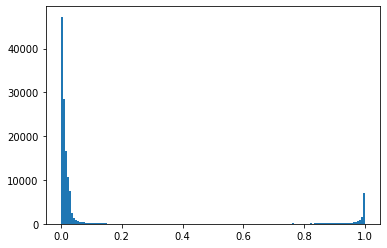

In [138]:
plt.hist(y_pred, bins=150)
plt.show()

In [139]:
f1_array = []
ths = np.linspace(0, 1, 100)
for th in ths:
    bin_score = (scores > th).astype(int)
    f1_array.append(f1_score(y_true=y_true, y_pred=bin_score))
ths[np.argmax(f1_array)]

0.20202020202020204

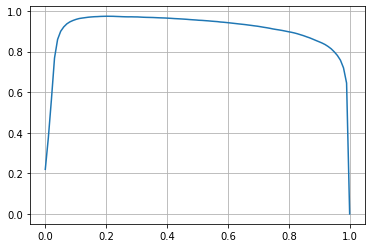

In [140]:
plt.plot(ths, f1_array)
plt.grid()
plt.show()

In [141]:
roc_auc_score(y_score=y_pred, y_true=y_true)

0.9978304901888373

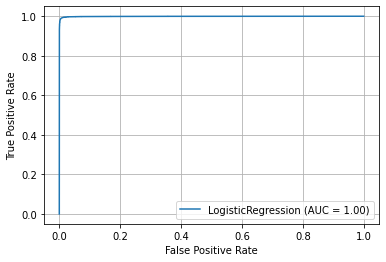

In [142]:
plot_roc_curve(y=y, X=X_train_prep, estimator=model)
plt.grid()

In [143]:
model.predict(X_test_prep)

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
np.unique(model.predict(X_test_prep))

array([0, 1])

In [145]:
test_dataset["target"] = model.predict(X_test_prep).astype(bool)

test_dataset[["id", "target"]].to_csv("selnik02", index=False)

!cat selnik02.csv | head

cat: selnik02.csv: No such file or directory


In [146]:
y_pr = model.predict(X_train_prep)
f1_score(y, y_pr)

0.9623529411764706